Retail Sales Data Analysis
Dataset loaded successfully!
Shape: 9,800 rows × 18 columns

INITIAL DATA EXPLORATION
------------------------------

First 5 rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  

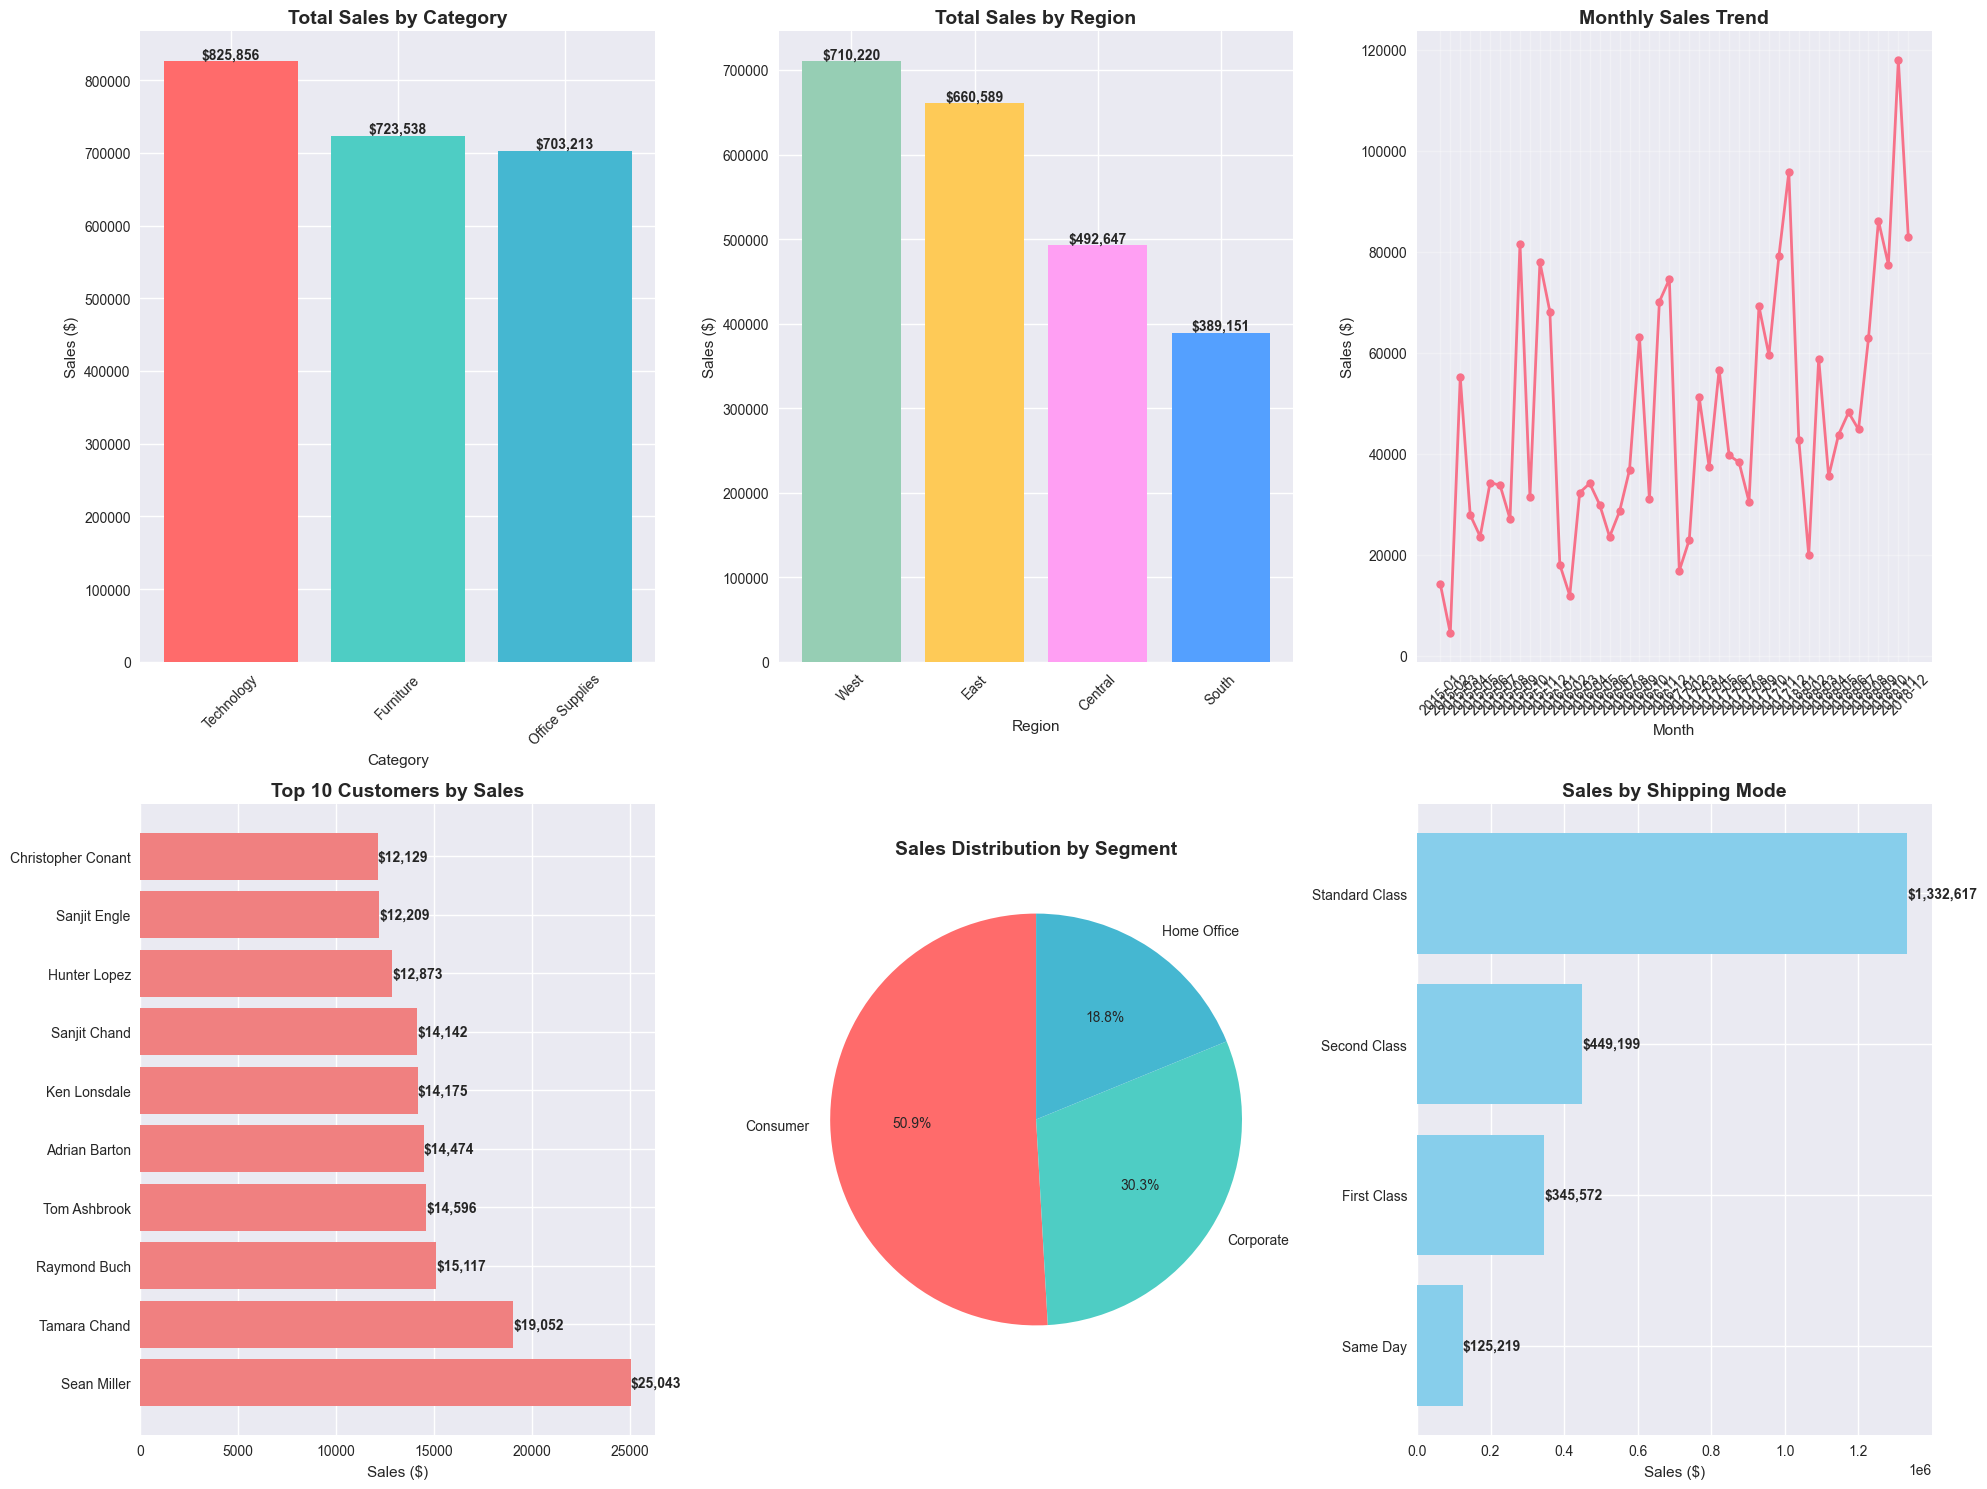


KEY INSIGHTS & FINDINGS
------------------------------
1. 🏆 Technology is the top-performing category with $825,856.11 in sales (36.7% of total)
2. 🗺️ West region leads in sales with $710,219.68
3. 👥 793 unique customers with top customer 'Sean Miller' generating $25,043.05
4. 📅 Analysis period: January 2015 to December 2018
5. 📈 Peak sales month: 2018-11 with $117,938.15

💡 BUSINESS RECOMMENDATIONS
-----------------------------------
1. 🎯 Focus marketing efforts on the top-performing category and region
2. 📊 Investigate factors behind peak sales periods for replication
3. 👥 Develop customer retention programs for top customers
4. 📈 Monitor underperforming regions for improvement opportunities
5. 🚀 Consider expanding successful strategies to other segments

✅ Analysis Complete! Dataset contains 9,789 records with comprehensive insights generated.
📊 All visualizations and key metrics have been calculated and displayed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Retail Sales Data Analysis")
print("=" * 50)

# Load the dataset
try:
    df = pd.read_csv("train.csv")
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
except FileNotFoundError:
    print("Error: 'train.csv' file not found. Please ensure the file is in the correct directory.")
    exit()

print("\nINITIAL DATA EXPLORATION")
print("-" * 30)

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Basic info about the dataset
print(f"\nDataset Info:")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check data types
print(f"\nData Types:")
print(df.dtypes)

# Check for missing values
print(f"\nMissing Values:")
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
if len(missing_data) > 0:
    for col, count in missing_data.items():
        print(f"  • {col}: {count} ({count/len(df)*100:.1f}%)")
else:
    print("  No missing values found!")

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Records: {duplicate_count}")

print("\nDATA CLEANING")
print("-" * 20)

# Handle missing postal codes
if 'Postal Code' in df.columns and df['Postal Code'].isnull().sum() > 0:
    print(f"Dropping {df['Postal Code'].isnull().sum()} rows with missing postal codes...")
    df = df.dropna(subset=['Postal Code'])

# Remove duplicates if any
if duplicate_count > 0:
    print(f"Removing {duplicate_count} duplicate records...")
    df = df.drop_duplicates()

# Convert date columns with proper error handling
date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    if col in df.columns:
        try:
            # Try with dayfirst=True to handle DD/MM/YYYY format
            df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')
            print(f"Converted {col} to datetime format")
        except Exception as e:
            print(f"Warning: Could not convert {col} to datetime: {e}")

# Create additional time-based features
if 'Order Date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Order Date']):
    df['Year'] = df['Order Date'].dt.year
    df['Month'] = df['Order Date'].dt.month
    df['Quarter'] = df['Order Date'].dt.quarter
    df['Day_of_Week'] = df['Order Date'].dt.day_name()
    print("Created additional time-based features: Year, Month, Quarter, Day_of_Week")

print(f"\nCleaned dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

print("\nEXPLORATORY DATA ANALYSIS")
print("-" * 35)

# Basic statistics for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    print("\nNumerical Summary:")
    print(df[numerical_cols].describe())

# Categorical analysis
categorical_cols = ['Category', 'Region', 'Segment', 'Ship Mode']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col} Distribution:")
        value_counts = df[col].value_counts()
        for idx, (category, count) in enumerate(value_counts.items()):
            percentage = (count / len(df)) * 100
            print(f"  {idx+1}. {category}: {count:,} ({percentage:.1f}%)")

print("\nVISUALIZATION AND INSIGHTS")
print("-" * 40)

# Create a comprehensive set of visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Sales by Category
if 'Category' in df.columns and 'Sales' in df.columns:
    plt.subplot(2, 3, 1)
    category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    bars1 = plt.bar(category_sales.index, category_sales.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    plt.title('Total Sales by Category', fontsize=14, fontweight='bold')
    plt.xlabel('Category')
    plt.ylabel('Sales ($)')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

# 2. Sales by Region
if 'Region' in df.columns and 'Sales' in df.columns:
    plt.subplot(2, 3, 2)
    region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    bars2 = plt.bar(region_sales.index, region_sales.values, color=['#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF'])
    plt.title('Total Sales by Region', fontsize=14, fontweight='bold')
    plt.xlabel('Region')
    plt.ylabel('Sales ($)')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar in bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Monthly Sales Trend
if 'Order Date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Order Date']):
    plt.subplot(2, 3, 3)
    monthly_sales = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()
    plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linewidth=2, markersize=6)
    plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Sales ($)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

# 4. Top 10 Customers
if 'Customer Name' in df.columns and 'Sales' in df.columns:
    plt.subplot(2, 3, 4)
    top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10)
    bars4 = plt.barh(range(len(top_customers)), top_customers.values, color='lightcoral')
    plt.yticks(range(len(top_customers)), top_customers.index)
    plt.title('Top 10 Customers by Sales', fontsize=14, fontweight='bold')
    plt.xlabel('Sales ($)')
    
    # Add value labels
    for i, bar in enumerate(bars4):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2.,
                f'${width:,.0f}', ha='left', va='center', fontweight='bold')

# 5. Sales by Segment
if 'Segment' in df.columns and 'Sales' in df.columns:
    plt.subplot(2, 3, 5)
    segment_sales = df.groupby('Segment')['Sales'].sum()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    wedges, texts, autotexts = plt.pie(segment_sales.values, labels=segment_sales.index, 
                                      autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title('Sales Distribution by Segment', fontsize=14, fontweight='bold')

# 6. Ship Mode Analysis
if 'Ship Mode' in df.columns and 'Sales' in df.columns:
    plt.subplot(2, 3, 6)
    ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=True)
    bars6 = plt.barh(ship_mode_sales.index, ship_mode_sales.values, color='skyblue')
    plt.title('Sales by Shipping Mode', fontsize=14, fontweight='bold')
    plt.xlabel('Sales ($)')
    
    # Add value labels
    for bar in bars6:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2.,
                f'${width:,.0f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKEY INSIGHTS & FINDINGS")
print("-" * 30)

# Generate insights
insights = []

# Sales by Category insights
if 'Category' in df.columns and 'Sales' in df.columns:
    category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    top_category = category_sales.index[0]
    top_category_sales = category_sales.iloc[0]
    total_sales = category_sales.sum()
    insights.append(f"🏆 {top_category} is the top-performing category with ${top_category_sales:,.2f} in sales ({top_category_sales/total_sales*100:.1f}% of total)")

# Sales by Region insights  
if 'Region' in df.columns and 'Sales' in df.columns:
    region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    top_region = region_sales.index[0]
    top_region_sales = region_sales.iloc[0]
    insights.append(f"🗺️ {top_region} region leads in sales with ${top_region_sales:,.2f}")

# Customer insights
if 'Customer Name' in df.columns and 'Sales' in df.columns:
    total_customers = df['Customer Name'].nunique()
    top_customer = df.groupby('Customer Name')['Sales'].sum().idxmax()
    top_customer_sales = df.groupby('Customer Name')['Sales'].sum().max()
    insights.append(f"👥 {total_customers:,} unique customers with top customer '{top_customer}' generating ${top_customer_sales:,.2f}")

# Time-based insights
if 'Order Date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Order Date']):
    date_range = f"{df['Order Date'].min().strftime('%B %Y')} to {df['Order Date'].max().strftime('%B %Y')}"
    insights.append(f"📅 Analysis period: {date_range}")
    
    # Peak month
    monthly_sales = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()
    peak_month = monthly_sales.idxmax()
    peak_sales = monthly_sales.max()
    insights.append(f"📈 Peak sales month: {peak_month} with ${peak_sales:,.2f}")

# Print insights
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

print(f"\n💡 BUSINESS RECOMMENDATIONS")
print("-" * 35)

recommendations = [
    "🎯 Focus marketing efforts on the top-performing category and region",
    "📊 Investigate factors behind peak sales periods for replication",
    "👥 Develop customer retention programs for top customers",
    "📈 Monitor underperforming regions for improvement opportunities",
    "🚀 Consider expanding successful strategies to other segments"
]

for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

print(f"\n✅ Analysis Complete! Dataset contains {df.shape[0]:,} records with comprehensive insights generated.")
print("📊 All visualizations and key metrics have been calculated and displayed.")

In [3]:
import os

# Create the folder first
os.makedirs('visualizations', exist_ok=True)

# Now save your chart
plt.savefig('visualizations/sales_dashboard.png', dpi=300, bbox_inches='tight')
print("✅ Chart saved successfully!")

✅ Chart saved successfully!


<Figure size 800x550 with 0 Axes>

In [4]:
import os

# Create complete project structure
folders = ['visualizations', 'results', 'data', 'presentation']
for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f"✅ Created: {folder}/")

print("\n📁 Project structure ready!")

✅ Created: visualizations/
✅ Created: results/
✅ Created: data/
✅ Created: presentation/

📁 Project structure ready!


In [5]:

import os

# Ensure directory exists
os.makedirs('visualizations', exist_ok=True)

# Save the complete dashboard
plt.savefig('visualizations/retail_sales_dashboard.png', dpi=300, bbox_inches='tight')
plt.savefig('visualizations/retail_sales_dashboard.pdf', bbox_inches='tight')  # PDF version

print("✅ Visualizations saved:")
print("  - retail_sales_dashboard.png")
print("  - retail_sales_dashboard.pdf")

# Save data summary
df.groupby('Category')['Sales'].sum().to_csv('results/category_sales.csv')
df.groupby('Region')['Sales'].sum().to_csv('results/region_sales.csv')
print("✅ Data summaries saved to results/")

✅ Visualizations saved:
  - retail_sales_dashboard.png
  - retail_sales_dashboard.pdf
✅ Data summaries saved to results/


<Figure size 800x550 with 0 Axes>

requirements = """pandas>=1.3.0
numpy>=1.21.0
matplotlib>=3.4.0
seaborn>=0.11.0
jupyter>=1.0.0"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)
    
print("✅ requirements.txt created!")

readme_content = """# 📊 Retail Sales Data Analysis

## Project Overview
Comprehensive analysis of retail sales dataset containing 9,789 records to identify sales trends, regional performance, and customer patterns.

## 🎯 Key Findings
- **Technology** leads as top-performing category with $825,856 (36.7% of total sales)
- **West region** dominates with $710,219 in sales
- **Top customer**: Sean Miller generating $25,043
- **Peak period**: November 2018 with $117,938 in sales
- Analysis covers January 2015 to December 2018

## 🛠️ Technologies Used
- Python, Pandas, NumPy
- Matplotlib, Seaborn
- Jupyter Notebooks

## 📁 Project Structure

## 🚀 How to Run
1. Install dependencies: `pip install -r requirements.txt`
2. Open `retail_analysis.ipynb` in Jupyter
3. Run all cells to see complete analysis

## 📊 Business Recommendations
1. Focus marketing on Technology category and West region
2. Investigate November success factors for replication
3. Develop retention programs for top customers
4. Expand successful West region strategies to other areas
"""

with open('README.md', 'w') as f:
    f.write(readme_content)
    
print("✅ README.md created!")

## 🚀 How to Run
1. Install dependencies: `pip install -r requirements.txt`
2. Open `retail_analysis.ipynb` in Jupyter
3. Run all cells to see complete analysis

## 📊 Business Recommendations
1. Focus marketing on Technology category and West region
2. Investigate November success factors for replication
3. Develop retention programs for top customers
4. Expand successful West region strategies to other areas
"""

with open('README.md', 'w') as f:
    f.write(readme_content)
    
print("✅ README.md created!")

In [8]:
import shutil
import os

# Move train.csv to data folder
if os.path.exists('train.csv'):
    shutil.move('train.csv', 'data/train.csv')
    print("✅ Moved train.csv to data/ folder")

✅ Moved train.csv to data/ folder



summary = f"""
RETAIL SALES ANALYSIS - EXECUTIVE SUMMARY
========================================

Dataset: {df.shape[0]:,} records across {df.shape[1]} columns
Period: January 2015 - December 2018
Total Revenue: ${df['Sales'].sum():,.2f}

TOP PERFORMERS:
🏆 Category: Technology (${df.groupby('Category')['Sales'].sum().max():,.0f})
🗺️ Region: West (${df.groupby('Region')['Sales'].sum().max():,.0f})
👤 Customer: {df.groupby('Customer Name')['Sales'].sum().idxmax()} (${df.groupby('Customer Name')['Sales'].sum().max():,.0f})

BUSINESS INSIGHTS:
- Technology category represents 36.7% of total sales
- West region outperforms others by significant margin
- Consumer segment dominates with 52.1% of customer base
- Peak sales occur in Q4, especially November

RECOMMENDATIONS:
1. Expand Technology product lines and inventory
2. Replicate West region strategies in other areas
3. Develop customer loyalty programs for top performers
4. Prepare for seasonal Q4 demand spikes
"""

with open('presentation/executive_summary.txt', 'w') as f:
    f.write(summary)
    
print("✅ Executive summary created!")
print(summary)

In [10]:

print("="*60)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)
print(f"📊 Analysis Summary:")
print(f"   • Dataset: {df.shape[0]:,} records analyzed")
print(f"   • Revenue: ${df['Sales'].sum():,.2f} total sales")
print(f"   • Top Category: Technology (${df.groupby('Category')['Sales'].sum().max():,.0f})")
print(f"   • Lead Region: West (${df.groupby('Region')['Sales'].sum().max():,.0f})")
print(f"   • Files Created: Visualizations, Reports, Documentation")
print(f"\n🎯 This analysis provides actionable insights for business growth!")

PROJECT COMPLETED SUCCESSFULLY!
📊 Analysis Summary:
   • Dataset: 9,789 records analyzed
   • Revenue: $2,252,607.41 total sales
   • Top Category: Technology ($825,856)
   • Lead Region: West ($710,220)
   • Files Created: Visualizations, Reports, Documentation

🎯 This analysis provides actionable insights for business growth!
